In [5]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('../troop_movements.csv')

In [8]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

First few rows of the DataFrame:
               timestamp  unit_id           unit_type empire_or_resistance  \
0    2024-07-11 10:35:30        1         tie_fighter               empire   
1    2024-07-11 10:35:29        2              x-wing               empire   
2    2024-07-11 10:35:28        3  resistance_soldier           resistance   
3    2024-07-11 10:35:27        4         tie_fighter           resistance   
4    2024-07-11 10:35:26        5               at-at           resistance   
..                   ...      ...                 ...                  ...   
995  2024-07-11 10:18:55      996              x-wing           resistance   
996  2024-07-11 10:18:54      997         tie_fighter               empire   
997  2024-07-11 10:18:53      998        tie_silencer               empire   
998  2024-07-11 10:18:52      999  resistance_soldier           resistance   
999  2024-07-11 10:18:51     1000  resistance_soldier               empire   

     location_x  location_y  d

In [27]:
grouped_factions = data.groupby('empire_or_resistance').size().reset_index(name="count")
print(grouped_factions)

  empire_or_resistance  count
0               empire    502
1           resistance    498


In [28]:
grouped_homeworlds = data.groupby('homeworld').size().reset_index(name="count")
print(grouped_homeworlds)

       homeworld  count
0       Alderaan     21
1    Aleen Minor     15
2     Bestine IV     19
3          Cerea     30
4       Champala     17
5      Chandrila     29
6   Concord Dawn     27
7       Corellia     22
8        Dagobah     29
9       Dathomir     28
10         Dorin     27
11        Eriadu     23
12   Glee Anselm     25
13    Haruun Kal     22
14       Iktotch     27
15      Iridonia     28
16         Kalee     37
17      Kashyyyk     24
18     Malastare     22
19        Mirial     29
20      Mon Cala     24
21    Muunilinst     22
22         Naboo     21
23          Ojom     26
24       Quermia     18
25         Rodia     18
26        Ryloth     22
27       Serenno     22
28         Shili     23
29         Skako     21
30       Socorro     23
31       Stewjon     27
32       Sullust     31
33      Tatooine     25
34       Tholoth     25
35      Toydaria     20
36     Trandosha     26
37       Troiken     18
38          Tund     22
39        Umbara     23
40       Vulpter

In [29]:
grouped_units = data.groupby('unit_type').size().reset_index(name="count")
print(grouped_units)

            unit_type  count
0               at-at    120
1               at-st    142
2  resistance_soldier    145
3        stormtrooper    121
4         tie_fighter    117
5        tie_silencer    118
6             unknown    122
7              x-wing    115


In [30]:
# Adding a new column for resistance boolean
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-07-11 10:35:30        1         tie_fighter               empire   
1  2024-07-11 10:35:29        2              x-wing               empire   
2  2024-07-11 10:35:28        3  resistance_soldier           resistance   
3  2024-07-11 10:35:27        4         tie_fighter           resistance   
4  2024-07-11 10:35:26        5               at-at           resistance   

   location_x  location_y  destination_x  destination_y   homeworld  \
0           5           9              7              3     Troiken   
1          10           7              1              4       Kalee   
2           9           3              5              8    Champala   
3           5           3              1              2  Bestine IV   
4          10          10              3              7    Champala   

   is_resistance  
0          False  
1          False  
2           True  
3           True  
4           True  


In [31]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 0, 'Empire or Resistance')

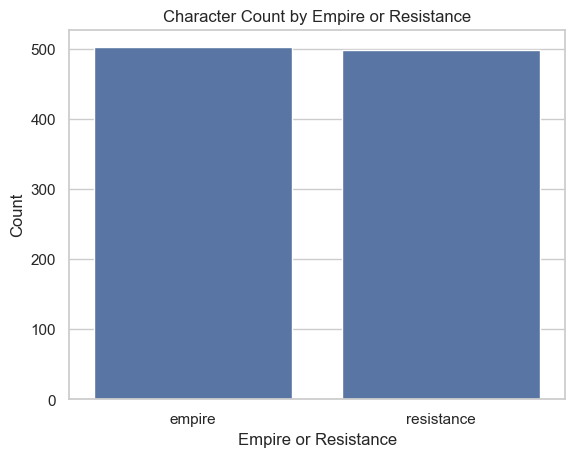

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# sns.barplot(data['empire_or_resistance'], color='skyblue') #histplot(data['Age'], kde=False, bins=20, color='skyblue')
sns.barplot(grouped_factions, x = "empire_or_resistance", y = "count").set(title="Character Count by Empire or Resistance")
plt.ylabel("Count")
plt.xlabel("Empire or Resistance")